# Titanic Project

# Problem Statement:

* The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV



import warnings
warnings.filterwarnings('ignore')

# Laoding Dataset

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Remove unwanted columns

In [3]:
df1=df.drop(columns=['PassengerId','Name'])
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [6]:
df1.shape

(891, 10)

* Hence there are 891 columns and 10 rows in data

# Finding null values

In [7]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Encoding Data using LabelEncoder()

In [8]:
le=LabelEncoder()

df1['Sex']=le.fit_transform(df1['Sex'])
df1['Ticket']=le.fit_transform(df1['Ticket'])
df1['Cabin']=le.fit_transform(df1['Cabin'])
df1['Embarked']=le.fit_transform(df1['Embarked'])
df1.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

# Filling null values with appropriate method

In [9]:
df1['Age'].fillna(df1['Age'].median(),inplace=True)
df1['Cabin'].fillna(df1['Cabin'].mode(),inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode(),inplace=True)
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

* Hence there is no null values found in the data

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int32  
 9   Embarked  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


* Hence there is no object type datas in the table

In [11]:
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
df.Survived.unique()

array([0, 1], dtype=int64)

# Data visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

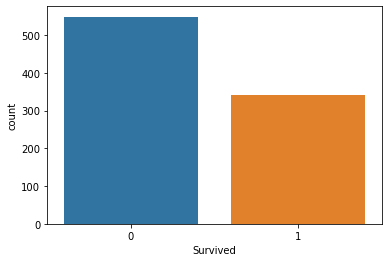

In [13]:
sns.countplot(x='Survived',data=df)
plt.show

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

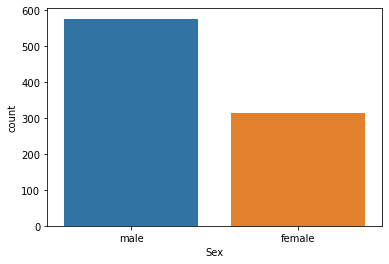

In [15]:
sns.countplot(x='Sex',data=df)
plt.show()

['S' 'C' 'Q' nan]


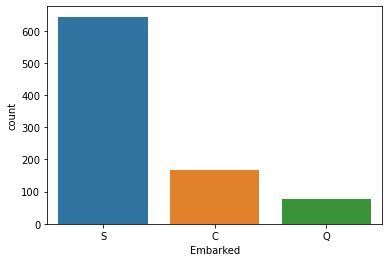

In [16]:
print(df.Embarked.unique())
sns.countplot(x='Embarked',data=df)
plt.show()

[3 1 2]


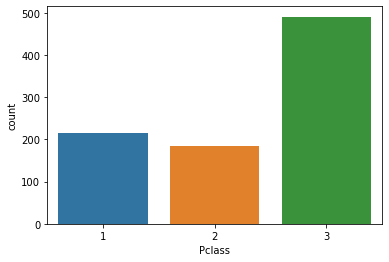

In [17]:
print(df.Pclass.unique())
sns.countplot(x='Pclass',data=df)
plt.show()

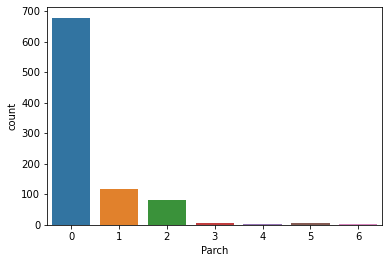

In [18]:
sns.countplot(x='Parch',data=df)
plt.show()

# Correlation between faetures and labels

In [19]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226
Cabin,-0.254888,0.684121,0.096681,-0.240839,0.043593,-0.028324,0.243696,-0.503355,1.000000,0.193205
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.006041,-0.221226,0.193205,1.000000


# Plotting correlation matrix

Text(0.5, 1.0, 'Correlation matrix')

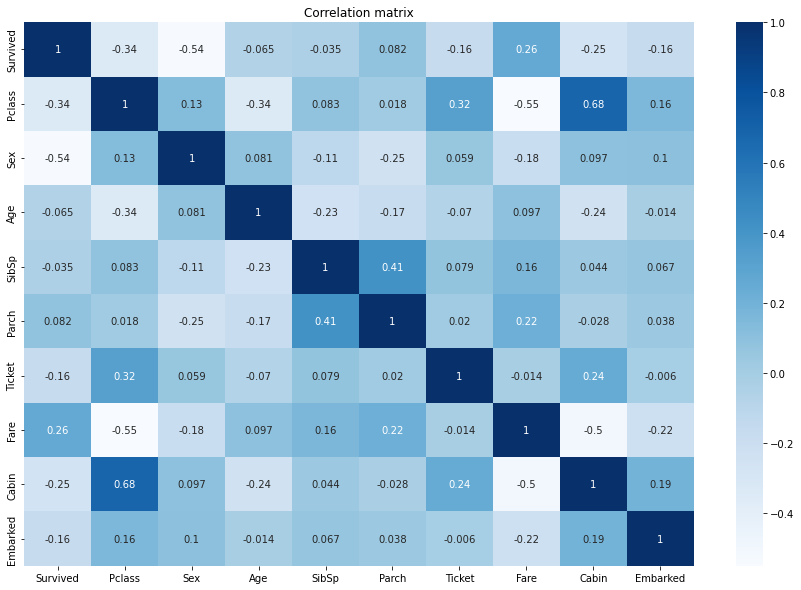

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),cmap='Blues',annot=True)
plt.title('Correlation matrix')

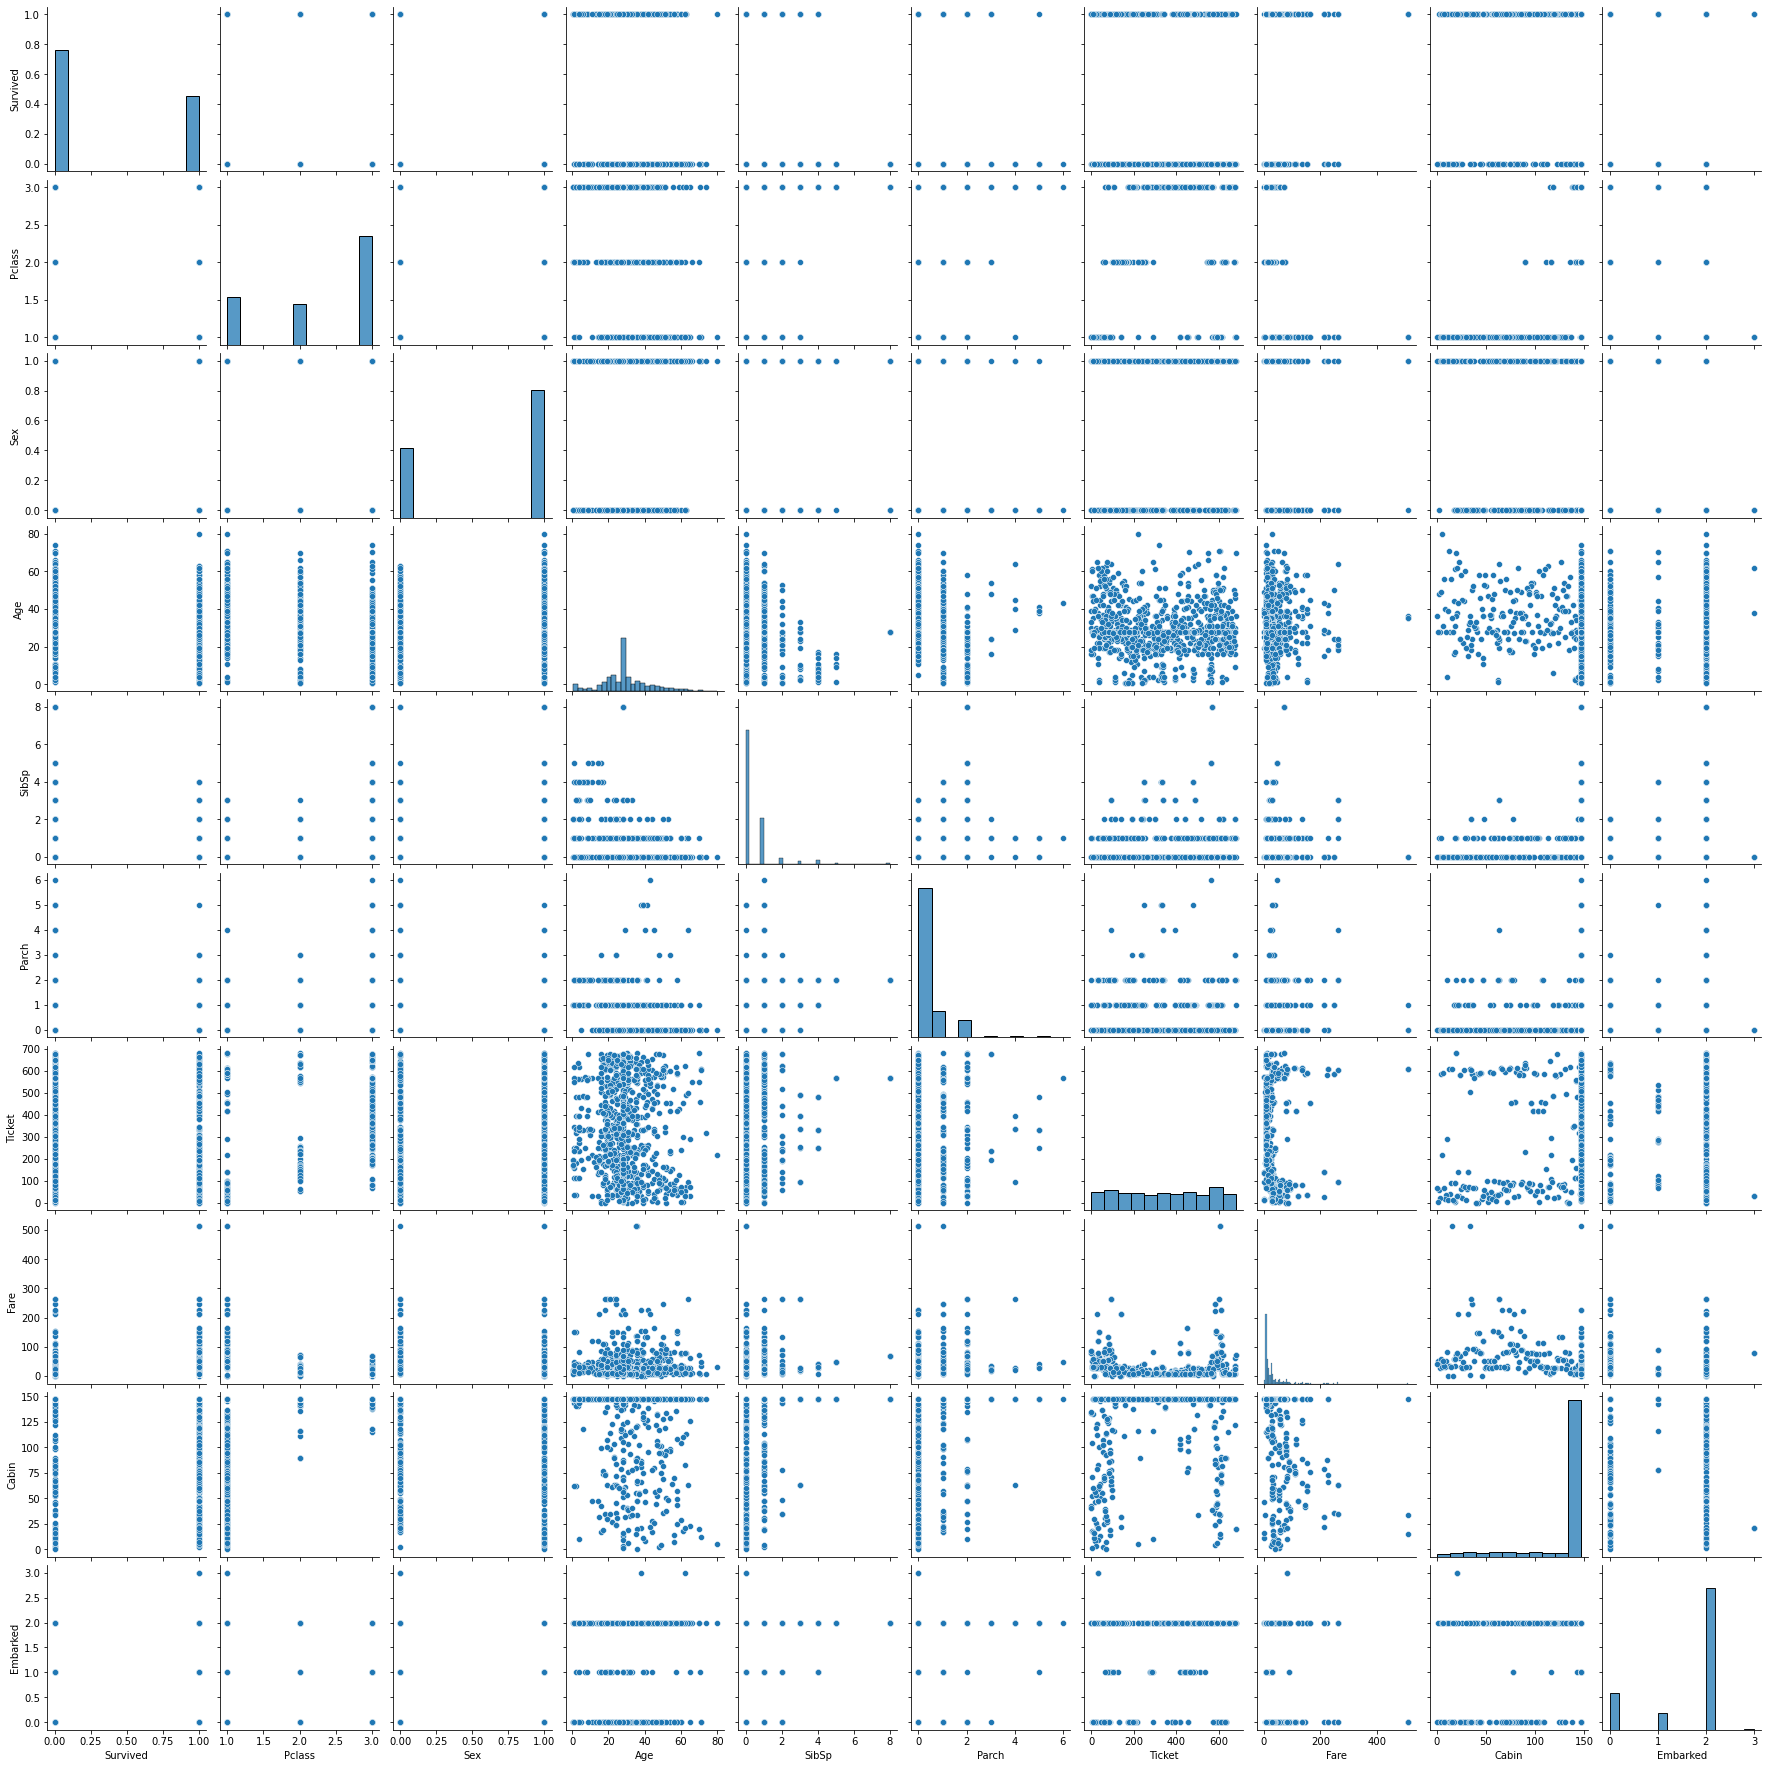

In [21]:
sns.pairplot(df1)

# Plotting scatter diagram

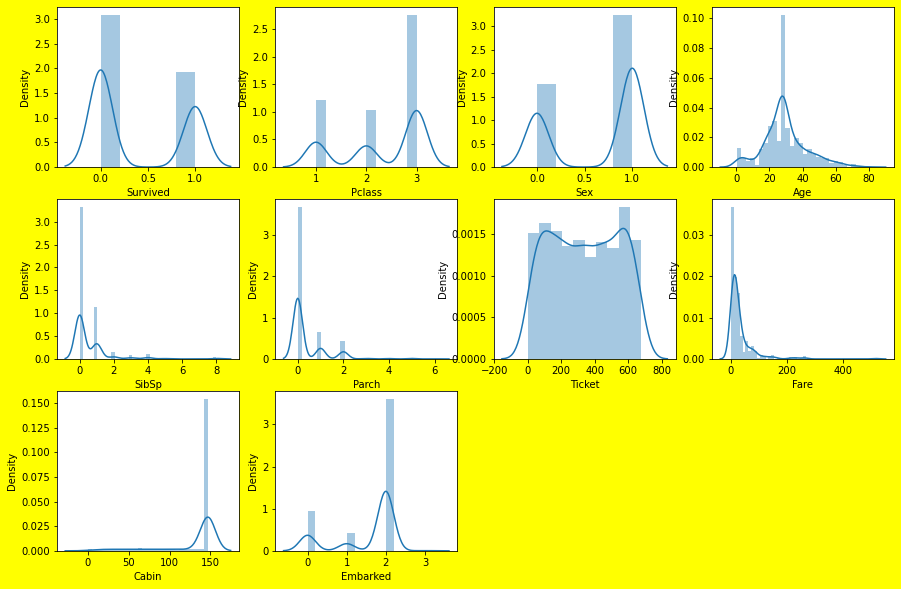

In [22]:
plt.figure(figsize=(15,10),facecolor='Yellow')
plotnumber=1

for column in df1:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    
        plotnumber+=1
        plt.tight_layout

# Finding skewness and removal

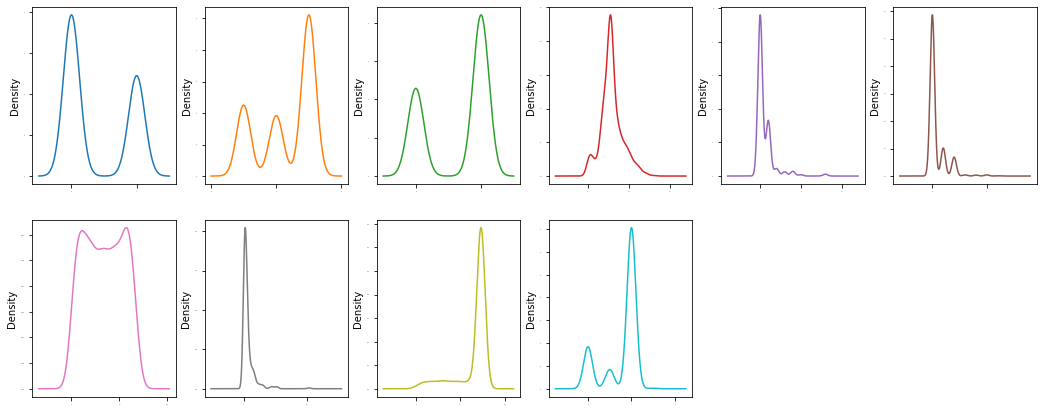

In [23]:
df1.plot(kind='density',subplots=True,layout=(4,6),sharex=False,legend=False,fontsize=1,figsize=(18,15))
plt.show()

In [24]:
x=df1.drop(columns=['Survived'])
y=df1['Survived']


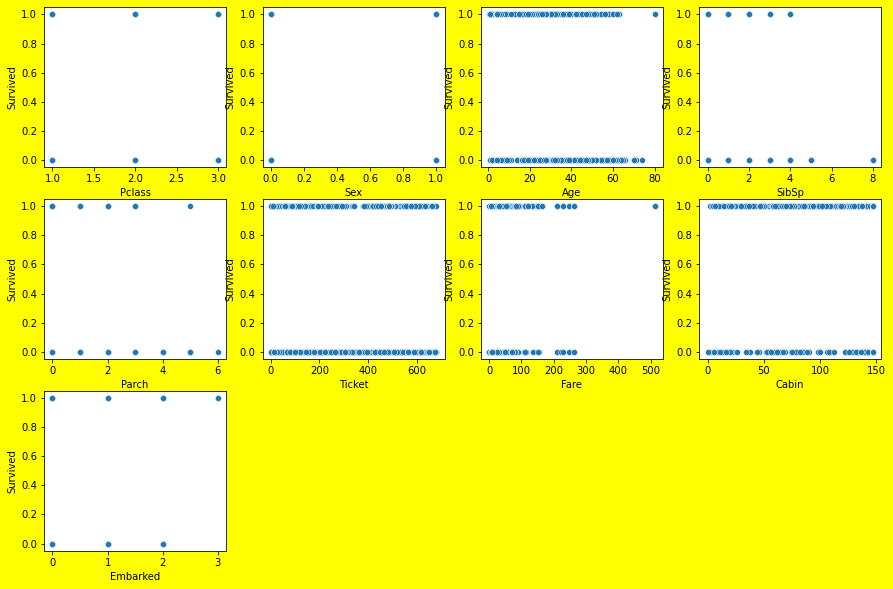

In [25]:
plt.figure(figsize=(15,10),facecolor='Yellow')
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Survived')
    
        plotnumber+=1
        plt.tight_layout

In [26]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin      -2.167313
Embarked   -1.246689
dtype: float64

# Removing skewness

In [27]:
x_new=np.sqrt(x[x.columns])
x_new.skew()

Pclass     -0.739999
Sex        -0.618921
Age        -0.759155
SibSp       1.436526
Parch       1.529799
Ticket     -0.548184
Fare        2.085004
Cabin      -2.629785
Embarked   -1.450908
dtype: float64

# Distribution plot after removing skewness

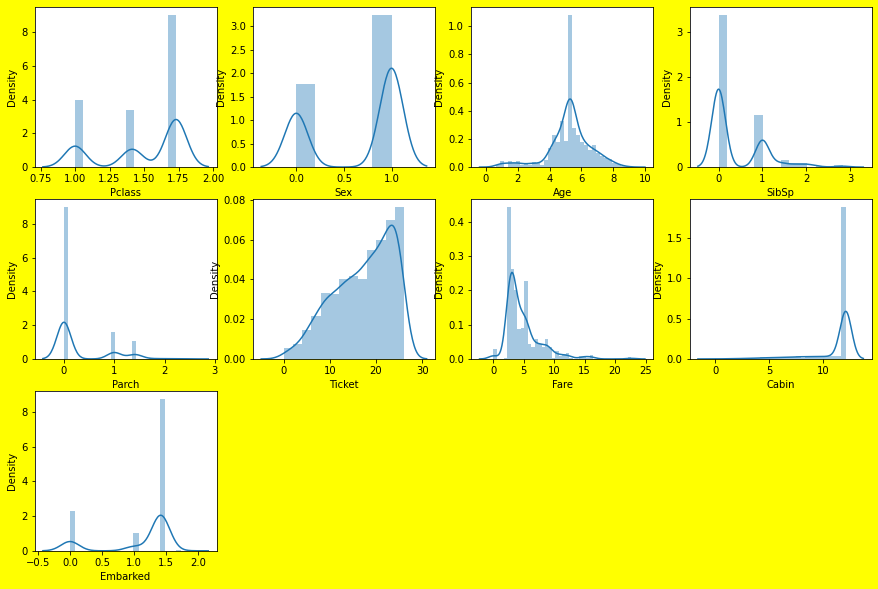

In [28]:
plt.figure(figsize=(15,10),facecolor='Yellow')
plotnumber=1

for column in x_new:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize=10)
    
        plotnumber+=1
        plt.tight_layout

# Pre-Processing

In [29]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new

array([[ 0.86397329,  0.73769513, -0.52338821, ..., -0.87882001,
         0.50466418,  0.58857363],
       [-1.45912855, -1.35557354,  0.68510924, ...,  1.33665056,
        -2.04790589, -1.76734807],
       [ 0.86397329, -1.35557354, -0.20809286, ..., -0.79006485,
         0.50466418,  0.58857363],
       ...,
       [ 0.86397329, -1.35557354, -0.05419603, ...,  0.28888536,
         0.50466418,  0.58857363],
       [-1.45912855,  0.73769513, -0.20809286, ...,  0.52790578,
        -2.21989764, -1.76734807],
       [ 0.86397329,  0.73769513,  0.24710852, ..., -0.81234947,
         0.50466418, -1.17740874]])

In [30]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

7   -1.602847
8   -0.861651
1   -0.618921
0   -0.441438
5   -0.299695
6   -0.040329
2    0.074644
3    0.808608
4    1.228795
dtype: float64

In [31]:
X=pd.DataFrame(x_new,columns=x.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.863973,0.737695,-0.523388,1.373636,-0.560253,0.906781,-0.878820,0.504664,0.588574
1,-1.459129,-1.355574,0.685109,1.373636,-0.560253,1.195448,1.336651,-2.047906,-1.767348
2,0.863973,-1.355574,-0.208093,-0.679850,-0.560253,1.473071,-0.790065,0.504664,0.588574
3,-1.459129,-1.355574,0.468033,1.373636,-0.560253,-1.571555,1.067352,-2.241273,0.588574
4,0.863973,0.737695,0.468033,-0.679850,-0.560253,0.697470,-0.774439,0.504664,0.588574
...,...,...,...,...,...,...,...,...,...
886,-0.592604,0.737695,-0.130855,-0.679850,-0.560253,-1.180070,-0.294907,0.504664,0.588574
887,-1.459129,-1.355574,-0.767474,-0.679850,-0.560253,-1.921742,0.527906,-2.287326,0.588574
888,0.863973,-1.355574,-0.054196,1.373636,1.846856,1.495449,0.288885,0.504664,0.588574
889,-1.459129,0.737695,-0.208093,-0.679850,-0.560253,-2.002674,0.527906,-2.219898,-1.767348


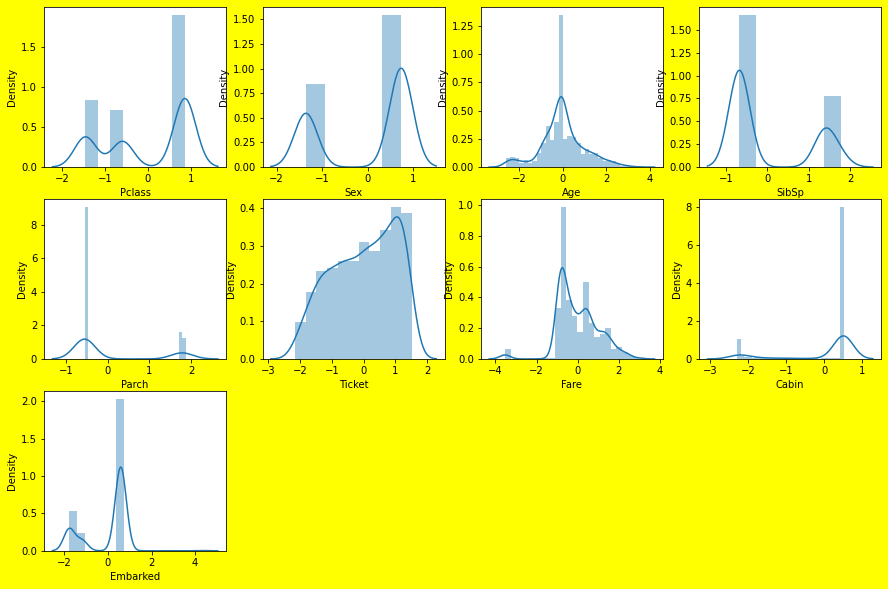

In [32]:
plt.figure(figsize=(15,10),facecolor='Yellow')
plotnumber=1

for column in X:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=10)
    
        plotnumber+=1
        plt.tight_layout

# Finding outliers

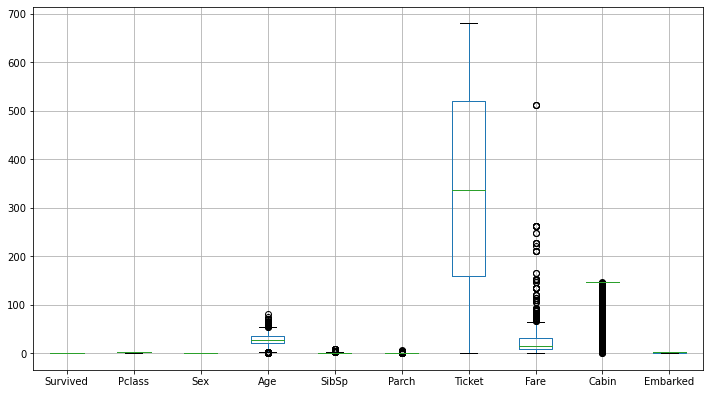

In [33]:
df1.boxplot(figsize=(12,8))
plt.subplots_adjust(bottom=0.25)
plt.show()


In [34]:
(np.abs(zscore(df1))<3).all()

Survived     True
Pclass       True
Sex          True
Age         False
SibSp       False
Parch       False
Ticket       True
Fare        False
Cabin       False
Embarked     True
dtype: bool

# Removing outliers using zscore function

In [35]:
scores=np.abs(zscore(df1))
t=3
np.where(scores<3)

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64),
 array([0, 1, 2, ..., 7, 8, 9], dtype=int64))

In [36]:
df_out=df1[(scores<3).all(axis=1)]
df_out.shape

(798, 10)

In [37]:
df_out.reset_index()  # Reset index

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,1,22.0,1,0,523,7.2500,147,2
1,1,1,1,0,38.0,1,0,596,71.2833,81,0
2,2,1,3,0,26.0,0,0,669,7.9250,147,2
3,3,1,1,0,35.0,1,0,49,53.1000,55,2
4,4,0,3,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
793,886,0,2,1,27.0,0,0,101,13.0000,147,2
794,887,1,1,0,19.0,0,0,14,30.0000,30,2
795,888,0,3,0,28.0,1,2,675,23.4500,147,2
796,889,1,1,1,26.0,0,0,8,30.0000,60,0


In [38]:
df_out.skew()

Survived    0.474816
Pclass     -0.711343
Sex        -0.661023
Age         0.401640
SibSp       1.965945
Parch       2.123012
Ticket      0.020723
Fare        2.407447
Cabin      -2.446818
Embarked   -1.301465
dtype: float64

# Splitting features and labels

In [39]:
X_new=df_out.drop(columns=['Survived'])
y=df_out['Survived']

# Scaling Data

In [40]:
std=StandardScaler()
x_scaled=std.fit_transform(X_new)
x_scaled

array([[ 0.80812887,  0.72311878, -0.60234509, ..., -0.60481656,
         0.41446701,  0.57867353],
       [-1.66744441, -1.38289868,  0.72715894, ...,  1.54498033,
        -1.8984328 , -1.97967261],
       [ 0.80812887, -1.38289868, -0.26996908, ..., -0.58215471,
         0.41446701,  0.57867353],
       ...,
       [ 0.80812887, -1.38289868, -0.10378108, ..., -0.06093221,
         0.41446701,  0.57867353],
       [-1.66744441,  0.72311878, -0.26996908, ...,  0.15897164,
        -2.63435546, -1.97967261],
       [ 0.80812887,  0.72311878,  0.22859493, ..., -0.58803001,
         0.41446701, -0.70049954]])

# Finding Best Random State

In [41]:
maxAccu=0 #maximum accuracy
maxRS=0   #best random state value for which max accuracy is acheived

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)     #fitting the data will train your model
    predrf=LR.predict(x_test)   #this is the predicted target variable
    acc=accuracy_score(y_test,predrf)  #accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy',maxAccu,'random_state',i)


accuracy 0.8 random_state 1
accuracy 0.8 random_state 1
accuracy 0.75 random_state 2
accuracy 0.75 random_state 3
accuracy 0.7875 random_state 4
accuracy 0.7375 random_state 5
accuracy 0.7875 random_state 6
accuracy 0.7625 random_state 7
accuracy 0.78125 random_state 8
accuracy 0.8 random_state 9
accuracy 0.73125 random_state 10
accuracy 0.8 random_state 11
accuracy 0.7875 random_state 12
accuracy 0.8 random_state 13
accuracy 0.81875 random_state 14
accuracy 0.81875 random_state 14
accuracy 0.7625 random_state 15
accuracy 0.81875 random_state 16
accuracy 0.8625 random_state 17
accuracy 0.8625 random_state 17
accuracy 0.83125 random_state 18
accuracy 0.7625 random_state 19
accuracy 0.7875 random_state 20
accuracy 0.775 random_state 21
accuracy 0.7875 random_state 22
accuracy 0.8125 random_state 23
accuracy 0.76875 random_state 24
accuracy 0.78125 random_state 25
accuracy 0.7625 random_state 26
accuracy 0.79375 random_state 27
accuracy 0.7375 random_state 28
accuracy 0.8 random_state 29


In [42]:
print("Best accuracy is ",maxAccu,"on random state",maxRS)

Best accuracy is  0.88125 on random state 36


# Create train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=36)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(638, 9) (160, 9) (638,) (160,)


# Module Building

# LinearRegressor()

In [44]:
LR.fit(x_train,y_train)                              #Fitting data to the module
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)   #Accuracy score
print(confusion_matrix(y_test,predlr))                #confusion matrix
print(classification_report(y_test,predlr))           #classification report

Accuracy 88.125
[[88  9]
 [10 53]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        97
           1       0.85      0.84      0.85        63

    accuracy                           0.88       160
   macro avg       0.88      0.87      0.88       160
weighted avg       0.88      0.88      0.88       160



# DecisionTreeClassifier()

In [45]:
clf=DecisionTreeClassifier()       #Fitting data to the module 

clf.fit(x_train,y_train)
preddt=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 87.5
[[87 10]
 [10 53]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        97
           1       0.84      0.84      0.84        63

    accuracy                           0.88       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.88      0.88      0.88       160



# RandomForestClassifier

In [46]:
rfc=RandomForestClassifier()     #Fitting data to the module
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc)*100)   #Accuracy score
print(confusion_matrix(y_test,predrfc))      #confusion matrix
print(classification_report(y_test,predrfc))  #classification report

88.125
[[87 10]
 [ 9 54]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        97
           1       0.84      0.86      0.85        63

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160



# SVC module

In [47]:
from sklearn.svm import SVC 
svc=SVC()
svc.fit(x_train,y_train)     #Fitting data to the module
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc)*100)    #Accuracy score
print(confusion_matrix(y_test,predsvc))       #confusion matrix
print(classification_report(y_test,predsvc))   #classification report

88.125
[[86 11]
 [ 8 55]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        97
           1       0.83      0.87      0.85        63

    accuracy                           0.88       160
   macro avg       0.87      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160



# Cross Validation Score

In [48]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_scaled,y,cv=5)
print("Cross validation score of logistic regression model is: ", scr.mean()*100)

Cross validation score of logistic regression model is:  79.2004716981132


In [49]:
scr2=cross_val_score(clf,x_scaled,y,cv=5)
print("Cross validation score of DecisionTreeClassification model is: ", scr2.mean()*100)

Cross validation score of DecisionTreeClassification model is:  79.20440251572327


In [50]:
scr3=cross_val_score(rfc,x_scaled,y,cv=5)
print("Cross validation score of RandomForest model is: ", scr3.mean()*100)

Cross validation score of RandomForest model is:  83.8380503144654


In [51]:
scr4=cross_val_score(svc,x_scaled,y,cv=5)
print("Cross validation score of SVC model is: ", scr4.mean()*100)

Cross validation score of SVC model is:  81.58176100628933


* Hence the RandomForestClassifier module shows best fit to get better accuracy score

# Hyperparameter tuning using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV


parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}


In [53]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_           #Getting best parameters

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}

In [54]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6)

In [55]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)*100

87.5

# Plotting ROC-AUC Curve

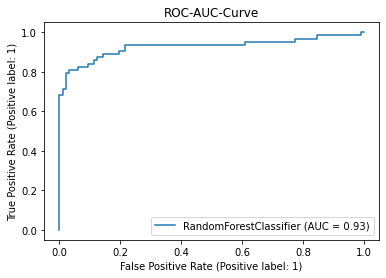

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC-Curve')
plt.show()

In [57]:
import pickle
filename='Titanic.pkl'
pickle.dump(rfc,open(filename,'wb'))